<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793506/blob/main/TecMty_kmeans_target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 496 kB/s 
     |████████████████████████████████| 1.0 MB 59.5 MB/s 
     |████████████████████████████████| 1.7 MB 41.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 55.1 MB/s 
     |████████████████████████████████| 6.3 MB 41.2 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=772f4acc0744c977b083408659ac4c63019734c5e919a66872f3cd257fbe1daf
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=4125d203609d7f5a1f4cedd96684615ec64ee97f758f0863f83e0fdfab8c38f0
  Stored in directory: /root/.

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [6]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

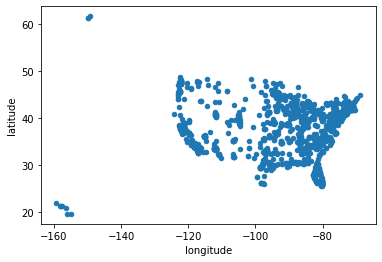

In [7]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [ ]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [9]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [10]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [11]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [12]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

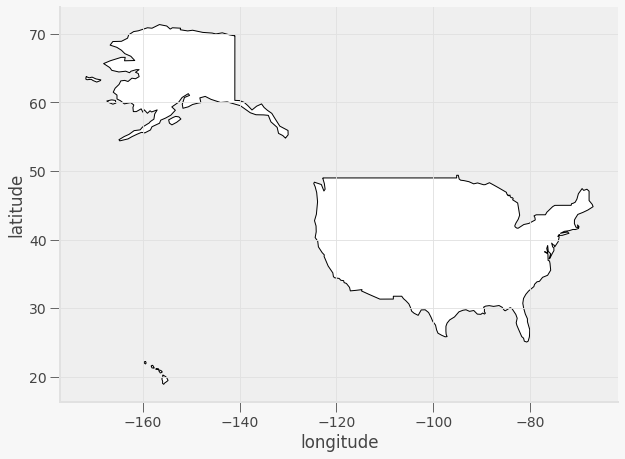

In [13]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

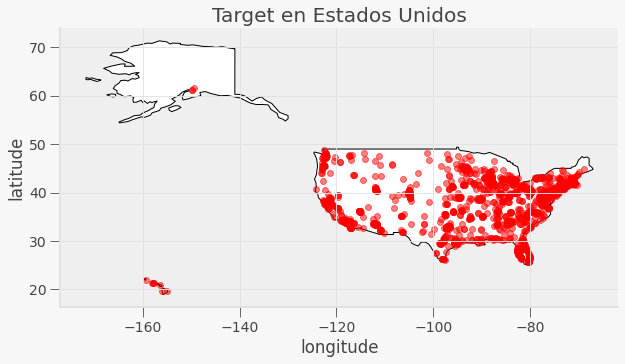

In [14]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

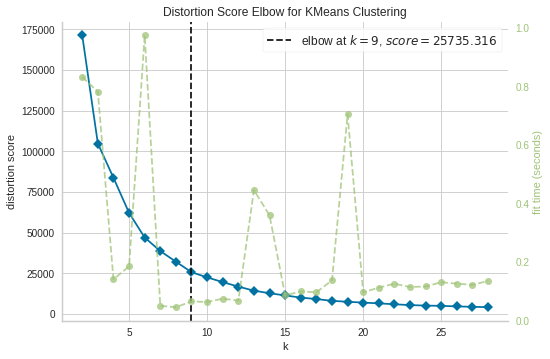

In [15]:
#tu codigo aquí
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

long_lat=list(zip(df.longitude, df.latitude))

# Utilizamos la función make_blobs para poner el archivo de coordenadas de forma Gaussiana y hacer las burbujas

blob_centers = long_lat

X, y = make_blobs(n_samples=1839, centers=blob_centers, cluster_std=0.20,
                  random_state=42)
# Aplicamos el modelo KElbowVisualizar de KMeans para que nos ayude a encontrar el mejor valor de k

# Con el mejor valor de k, es que determinaremos el número de almacenes a proponer

model = KElbowVisualizer(KMeans(), k=(2,29))
model.fit(X)
model.show()

In [16]:
# Utilizamos el mejor valor de K para llamar la funcion Kmeans y entrenar el modelo, así como sacar predicciones de Y
k = model.elbow_value_

kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

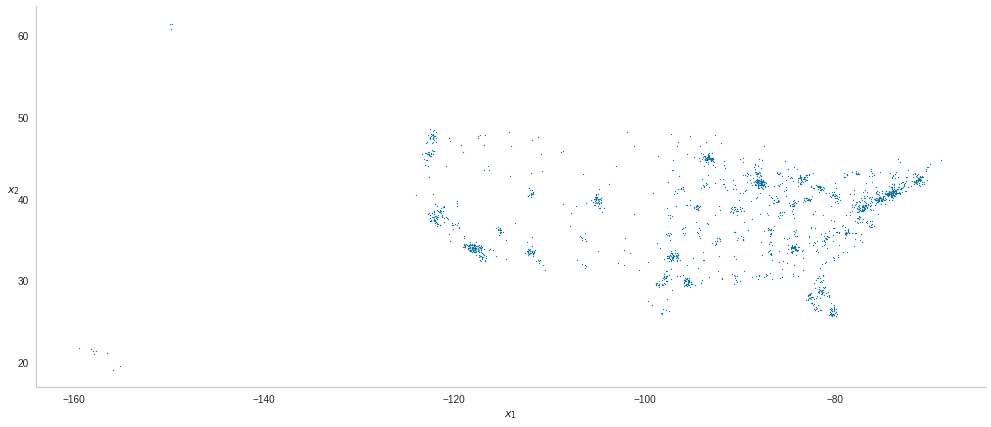

In [17]:
# Se crea una función que nos ayude a sacar la gráfica final para mostrar visualmente los almacenes propuestos

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(17, 7))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a qué distancia estará?

In [18]:
# En esta parte encontramos la latitud y longitud de los almacenes propuestos

Clusters=kmeans.cluster_centers_
Clusters

array([[-118.9395852 ,   35.43123455],
       [ -82.44559961,   31.1312363 ],
       [ -96.09110803,   31.78619918],
       [ -94.0356954 ,   43.11677621],
       [-122.63109527,   46.97755989],
       [-108.63150503,   37.44355794],
       [ -86.26562249,   40.84234198],
       [ -75.2401236 ,   40.36468462],
       [-157.31816631,   20.8436751 ]])

In [19]:
# Con ayuda de esta función de ubicación, vamos a obtener los parámetros necesarios para poder dibujar el mapa de Estados Unidos
# en nuestro plot

def ubicacion(Clusters):
    Clusters = pd.DataFrame(Clusters, columns = ['Lat','Long'])
    Clusters["Coordinates"] = list(zip(Clusters.Lat, Clusters.Long))
    Clusters["Coordinates"] = Clusters["Coordinates"].apply(Point)
    gdf = gpd.GeoDataFrame(Clusters, geometry="Coordinates")

    fig, gax = plt.subplots(figsize=(10,10))

    world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

    gdf.plot(ax=gax, color='Blue', alpha = 0.5)

    gax.set_xlabel('longitude')
    gax.set_ylabel('latitude')
    gax.set_title('Target en Estados Unidos')

    gax.spines['top'].set_visible(False)
    gax.spines['right'].set_visible(False)

    return plt.show()

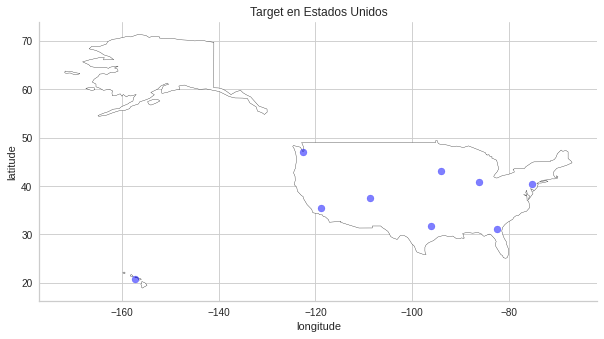

In [20]:
# En esta línea podemos ver visualmente dónde estarán ubicados los almacenes propuestos

ubicacion(Clusters)

In [21]:
# En esta sección estamos obteniendo el ID de tienda que se encuentra más cercana a cada almacén propuesto, así como su dirección

from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(Clusters, X)
print("ID de tienda cercana por almacén:",closest)

print("\nDirección de cada una de estas tiendas\n")
users=df['address'].values
for row in closest:
    print(users[row])

ID de tienda cercana por almacén: [  23  306  540  143 1688 1483 1542 1027 1626]

Dirección de cada una de estas tiendas

1200 N Muldoon Rd, Anchorage, AK 99504-6103
15700 E Briarwood Cir, Aurora, CO 80016-1558
633 N Milwaukee St, Boise, ID 83704-9139
11051 Victory Blvd, North Hollywood, CA 91606-3719
14391 Chantilly Crossing Ln, Chantilly, VA 20151-2118
2000 9th Ave SE, Watertown, SD 57201-5352
201 E Central Texas Expy, Harker Heights, TX 76548-2747
333 N 48th St, Lincoln, NE 68504-3505
19955 Katy Fwy, Houston, TX 77094-1019


In [22]:
# En esta sección, obtenemos la ciudad de cada una de las tiendas más cercanas, para usarla como referencia de ciudad para los almacenes
# Separamos por comas el campo de address y después a la asignación de ciudad, se le vuelve a hacer un string split para quedarnos solamente con
# el nombre de la ciudad

direccion_almacen = df["address"].str.split(',',expand=True)

direccion_almacen.columns = ['direccion', 'Ciudad','Estado','Telefono']

ciudad=direccion_almacen["Ciudad"].str.split(expand=True)
ciudad=ciudad[0]

closest, _ = pairwise_distances_argmin_min(Clusters, X)

users = ciudad.values
ciudades= list()
for row in closest:
    ciudades.append(users[row])

print(ciudades)

['Anchorage', 'Aurora', 'Boise', 'North', 'Chantilly', 'Watertown', 'Harker', 'Lincoln', 'Houston']


In [23]:
# En esta sección de código obtenemos la cantidad de tiendas a las cuales, cada almacén debe dar abasto
# Dando en total las 1839

referencias=[ciudades[0],ciudades[1],ciudades[2],ciudades[3],ciudades[4],ciudades[5],ciudades[6],ciudades[7],]
lista_almacenes =  pd.DataFrame()
lista_almacenes['usuario']=df['latitude'].values
lista_almacenes['categoria']=df['longitude'].values
lista_almacenes['label'] = y_pred;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['Almacén propuesto ']=referencias
cantidadGrupo['Cantidad de Tiendas a dar abasto']=lista_almacenes.groupby('label').size()
cantidadGrupo

,Almacén propuesto,Cantidad de Tiendas a dar abasto
0,Anchorage,219
1,Aurora,260
2,Boise,204
3,North,151
4,Chantilly,73
5,Watertown,131
6,Harker,341
7,Lincoln,452


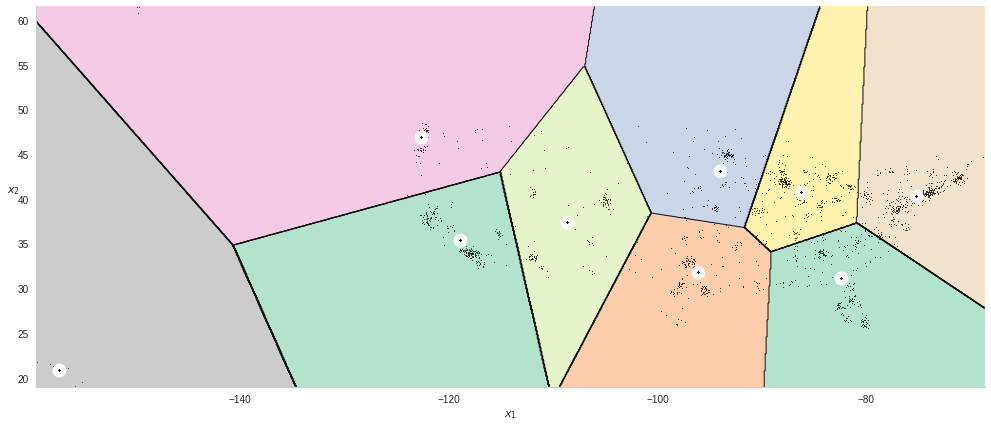

In [24]:
# En esta sección graficamos visualmente el territorio que cada uno de los almacenes estará cubriendo

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    W=Z

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


plt.figure(figsize=(17, 7))
plot_decision_boundaries(kmeans, X)
plt.show()

In [25]:
# En esta parte del código, estamos graficando la distancia a la cual cada almacén (en columnas) se encuentra para 
# cada una de las tiendas (renglones), las cuales vienen identificadas por la ciudad en la cual están ubicadas

tienda_ciudad=pd.DataFrame(ciudades)

print('Tabla 2 Que tan lejos esta de cada punto cada tienda')
Distancia=pd.DataFrame(kmeans.transform(X).round(0))
Distancia=Distancia.set_axis(tienda_ciudad,axis=1)
Distancia=Distancia.set_axis(ciudad,axis=0)
Distancia

Tabla 2 Que tan lejos esta de cada punto cada tienda


,"(Anchorage,)","(Aurora,)","(Boise,)","(North,)","(Chantilly,)","(Watertown,)","(Harker,)","(Lincoln,)","(Houston,)"
0,,,,,,,,,
Alabaster,1.0,37.0,23.0,27.0,13.0,11.0,33.0,44.0,41.0
Bessemer,23.0,16.0,7.0,5.0,27.0,12.0,11.0,21.0,63.0
Daphne,32.0,14.0,15.0,6.0,34.0,21.0,4.0,14.0,73.0
Decatur,3.0,35.0,21.0,25.0,15.0,10.0,32.0,43.0,42.0
Dothan,4.0,40.0,27.0,29.0,9.0,13.0,36.0,47.0,39.0
...,...,...,...,...,...,...,...,...,...
Waukesha,2.0,35.0,22.0,25.0,14.0,10.0,32.0,43.0,42.0
Waukesha,28.0,16.0,13.0,2.0,30.0,17.0,7.0,18.0,69.0
Casper,39.0,5.0,16.0,16.0,44.0,29.0,8.0,7.0,79.0
